**IMPORTS**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

d:\WorkSpace\anaconda\envs\tensor\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\WorkSpace\anaconda\envs\tensor\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
d:\WorkSpace\anaconda\envs\tensor\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
#tf.compat.v1.enable_eager_execution() 
from tensorflow.keras.utils import plot_model
from sklearn import tree
from tensorflow.keras import models, layers
import warnings

from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve,precision_recall_fscore_support
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer  
from transformers import TFBertModel, BertTokenizer
import sqlparse

**LOADING AND PREPROCESSING DATASET**

In [3]:
path = './datasets/'
df = pd.read_csv(path + "MMMModified_SQL_Dataset.csv")
print("Data Shape:", df.shape)
df.head(10)

Data Shape: (30444, 2)


,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
6,select * from users where id = 1 +$+ or 1 =...,1
7,"1; ( load_file ( char ( 47,101,116,99,47...",1
8,select * from users where id = '1' or ||/1 ...,1
9,select * from users where id = '1' or \.<\ ...,1


In [4]:
def parse_sql(sql):
    try:
        stmt = sqlparse.parse(sql)[0]
    except:
        stmt = None
    if stmt == None:
        return None
    else :
        return stmt.tokens
    

In [5]:
X = df['Query']
y = df['Label']
print(X.shape, y.shape)
X = X.apply(parse_sql) 

#print("Dataset Input:", "\n", X.head(5))
#print("Dataset Label:", "\n", y.head(5))

(30444,) (30444,)


In [6]:
type(X[0])

list

In [7]:
import nltk
nltk.download('stopwords')
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.astype('U')).toarray()
w=1

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     远程主机强迫关闭了一个现有的连接。>


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24355, 3967)
(24355,)
(6089, 3967)
(6089,)


In [9]:
f1_dict = {}
precision_dict = {}
recall_dict = {}
accuracy_dict = {}
train_accuracy = {}
validation_accuracy = {}
test_accuracy = {}

**LOGISTIC REGRESSION**

In [ ]:
lr_clf = LogisticRegression()
y_pred_lr = lr_clf.fit(X_train, y_train)
y_pred = y_pred_lr.predict(X_test)
print(f"Accuracy of Logistic Regression on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Logistic Regression on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["LogisticRegression"] = f1_score(y_pred, y_test)
precision_dict["LogisticRegression"] = precision_score(y_pred, y_test)
recall_dict["LogisticRegression"] = recall_score(y_pred, y_test)
accuracy_dict['LogisticRegression'] = accuracy_score(y_pred, y_test)

Accuracy of Logistic Regression on test set : 0.9674823452126786
F1 Score of Logistic Regression on test set : 0.9564452265728113


**RANDOM FOREST**

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(f"Accuracy of Random Forest on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Random Forest on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["RandomForest"] = f1_score(y_pred, y_test)
precision_dict["RandomForest"] = precision_score(y_pred, y_test)
recall_dict["RandomForest"] = recall_score(y_pred, y_test)
accuracy_dict['RandomForest'] = accuracy_score(y_pred, y_test)

Accuracy of Random Forest on test set : 0.9944161602890458
F1 Score of Random Forest on test set : 0.9926054806437581


**SUPPORT VECTOR MACHINES**

In [ ]:
svm_clf = SVC(gamma = 'auto')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print(f"Accuracy of SVM on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of SVM on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["SVM"] = f1_score(y_pred, y_test)
precision_dict["SVM"] = precision_score(y_pred, y_test)
recall_dict["SVM"] = recall_score(y_pred, y_test)
accuracy_dict['SVM'] = accuracy_score(y_pred, y_test)

Accuracy of SVM on test set : 0.910987025784201
F1 Score of SVM on test set : 0.8670917116233448


**NAIVE BAYES**

In [ ]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["NaiveBayes"] = f1_score(y_pred, y_test)
precision_dict["NaiveBayes"] = precision_score(y_pred, y_test)
recall_dict["NaiveBayes"] = recall_score(y_pred, y_test)
accuracy_dict['NaiveBayes'] = accuracy_score(y_pred, y_test)

Accuracy of Naive Bayes on test set : 0.7869929380850714
F1 Score of Naive Bayes on test set : 0.775799481417459


DECISION TREES


In [10]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["DecisionTree"] = f1_score(y_pred, y_test)
precision_dict["DecisionTree"] = precision_score(y_pred, y_test)
recall_dict["DecisionTree"] = recall_score(y_pred, y_test)
accuracy_dict['DecisionTree'] = accuracy_score(y_pred, y_test)

Accuracy of Naive Bayes on test set : 0.9919527015930366
F1 Score of Naive Bayes on test set : 0.98938704786658


**CONVOLUTIONAL NEURAL NETWORK**

In [11]:
# Function to plot the history graphs of the training and validation curves during training
def plot_history(history):
    history_dict = history.history
    train_loss = history_dict['loss']    # Training loss over epochs
    val_loss = history_dict['val_loss']    # Validation loss over epochs
    epochs = range(1, len(history_dict['loss'])+1)
    plt.plot(epochs, train_loss,'b', label='Training error')
    plt.plot(epochs, val_loss,'b', color="orange", label='Validation error')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_historyAcc(history):
    history_dict = history.history
    train_acc = history_dict['accuracy']    # Training loss over epochs
    val_acc = history_dict['val_accuracy']    # Validation loss over epochs
    epochs = range(1, len(history_dict['accuracy'])+1)
    plt.plot(epochs, train_acc,'b', label='Training accuracy')
    plt.plot(epochs, val_acc,'b', color="orange", label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix):    
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predicted Value', fontsize=18)
    plt.ylabel('Actual Value', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

In [12]:
model = models.Sequential()
model.add(layers.Conv1D(32, 1, activation = 'relu', input_shape = (1,3967)))
model.add(layers.Conv1D(32, 1, activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

X_train1 = X_train.reshape(-1, 1, 3967)
X_test1 = X_test.reshape(-1, 1, 3967)

history = model.fit(X_train1, y_train, epochs = 7, validation_data = (X_test1, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 32)             126976    
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 32)             1056      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 128,065
Trainable params: 128,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/7
762/762 [==============================] - 3s 3ms/step - loss: 0.1470 - accuracy: 0.9559 - val_loss: 0.0530 - val_accuracy: 0.9816
Epoch 2/7
762/762 [======================

In [13]:
y_pred = model.predict(X_test1).flatten()
# y_pred1 = [1 if x>-0.5 else 0 for x in y_pred]
y_pred = np.round(y_pred)
print(f"Accuracy of CNN on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of CNN on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["CNN"] = f1_score(y_pred, y_test)
precision_dict["CNN"] = precision_score(y_pred, y_test)
recall_dict["CNN"] = recall_score(y_pred, y_test)
accuracy_dict['CNN'] = accuracy_score(y_pred, y_test)

191/191 [==============================] - 0s 1ms/step
Accuracy of CNN on test set : 0.9926096239119724
F1 Score of CNN on test set : 0.9902322552637292


In [14]:
plot_model(model, show_shapes=True, to_file='CNN.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


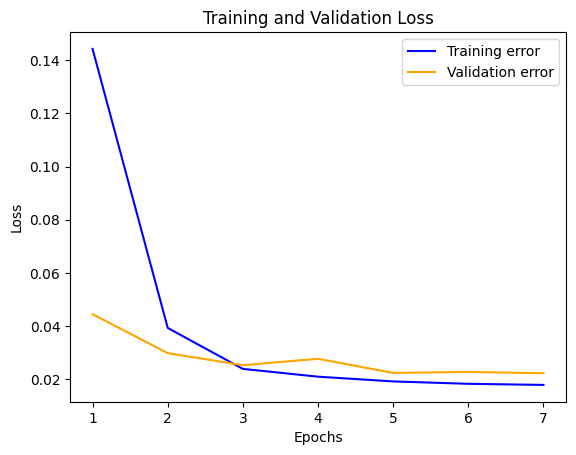

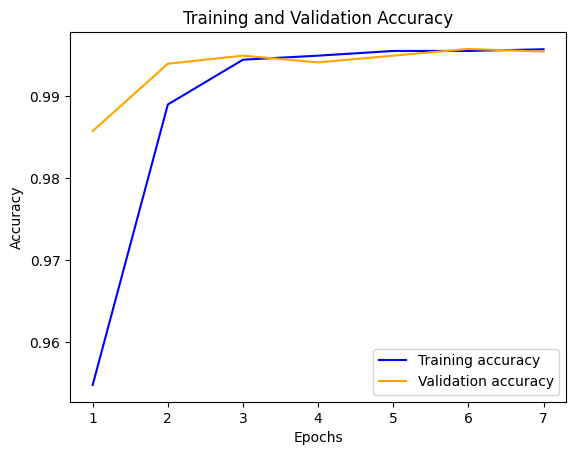

In [15]:
# Plots loss over epochs
plot_history(history)
plot_historyAcc(history)

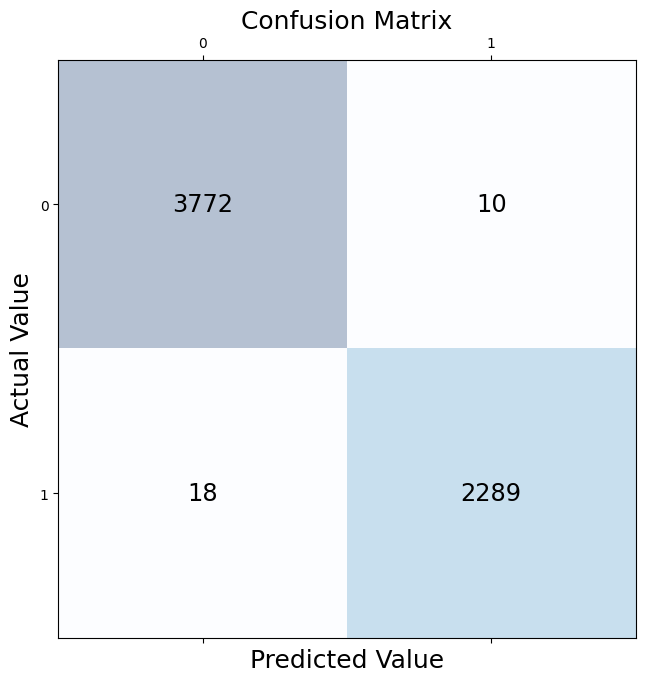

               precision    recall  f1-score   support

Non-Intrusion       1.00      1.00      1.00      3782
    Intrusion       1.00      0.99      0.99      2307

     accuracy                           1.00      6089
    macro avg       1.00      0.99      1.00      6089
 weighted avg       1.00      1.00      1.00      6089



In [16]:
# Plots confusion matrix and displays classification report
conf_matrix_model = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix_model)
print(classification_report(y_test, y_pred, target_names=["Non-Intrusion", "Intrusion"]))

FINAL PLOT FOR MODELS PERFORMANCE

In [40]:
keys2 = f1_dict, precision_dict, recall_dict, accuracy_dict
metrics = ['F1_Score', 'Precision', 'Recall', 'Accuracy']
data = pd.DataFrame(keys2)
data.index = metrics
data

,CNN
F1_Score,0.993435
Precision,0.997802
Recall,0.989107
Accuracy,0.995073


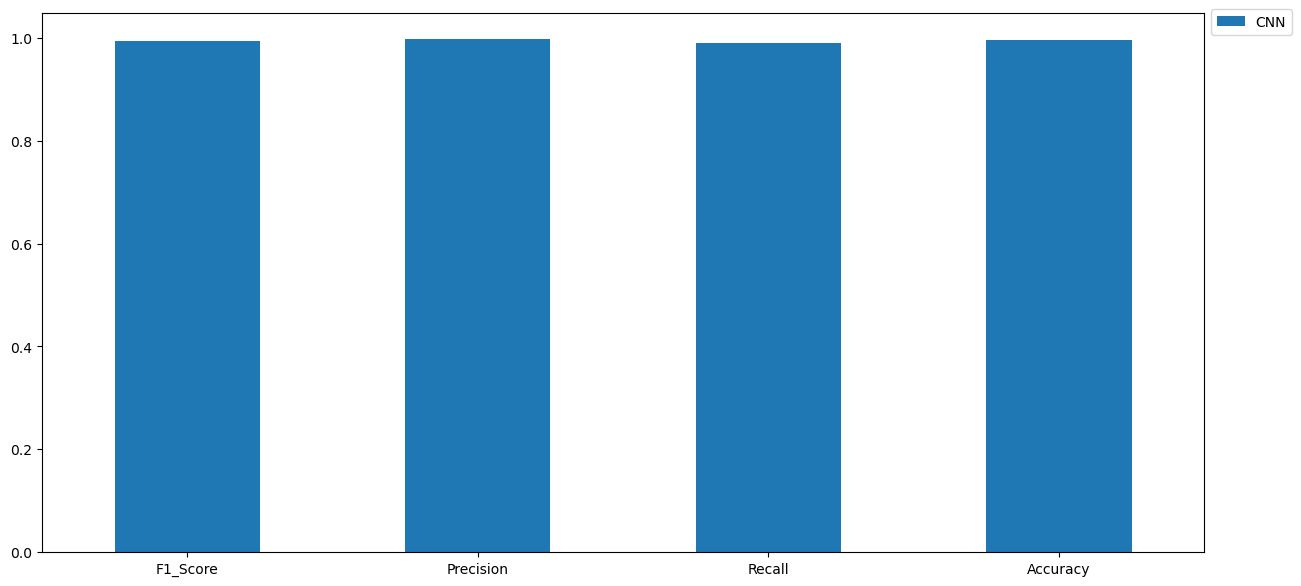

In [41]:
result = data.plot(kind='bar', rot=0, figsize=(15, 7));
result.legend(bbox_to_anchor=(1, 1.02), loc='upper left');

In [42]:
from keras.models import load_model
import pickle

model.save('my_model_cnn_Modified.h5')
with open('vectorizer_cnn_sqlparse', 'wb') as fin:
    pickle.dump(vectorizer, fin)

In [43]:
import keras
from keras.models import load_model
import pickle


mymodel = tf.keras.models.load_model('my_model_cnn_Modified.h5')
myvectorizer = pickle.load(open("vectorizer_cnn_sqlparse", 'rb'))

In [44]:
def clean_data(input_val):
    input_val=input_val.replace('\n', '')
    input_val=input_val.replace('%20', ' ')
    input_val=input_val.replace('=', ' = ')
    input_val=input_val.replace('((', ' (( ')
    input_val=input_val.replace('))', ' )) ')
    input_val=input_val.replace('(', ' ( ')
    input_val=input_val.replace(')', ' ) ')
    input_val=input_val.replace('1 ', 'numeric')
    input_val=input_val.replace(' 1', 'numeric')
    input_val=input_val.replace("'1 ", "'numeric ")
    input_val=input_val.replace(" 1'", " numeric'")
    input_val=input_val.replace('1,', 'numeric,')
    input_val=input_val.replace(" 2 ", " numeric ")
    input_val=input_val.replace(' 3 ', ' numeric ')
    input_val=input_val.replace(' 3--', ' numeric--')
    input_val=input_val.replace(" 4 ", ' numeric ')
    input_val=input_val.replace(" 5 ", ' numeric ')
    input_val=input_val.replace(' 6 ', ' numeric ')
    input_val=input_val.replace(" 7 ", ' numeric ')
    input_val=input_val.replace(" 8 ", ' numeric ')
    input_val=input_val.replace('1234', ' numeric ')
    input_val=input_val.replace("22", ' numeric ')
    input_val=input_val.replace(" 8 ", ' numeric ')
    input_val=input_val.replace(" 200 ", ' numeric ')
    input_val=input_val.replace("23 ", ' numeric ')
    input_val=input_val.replace('"1', '"numeric')
    input_val=input_val.replace('1"', '"numeric')
    input_val=input_val.replace("7659", 'numeric')
    input_val=input_val.replace(" 37 ", ' numeric ')
    input_val=input_val.replace(" 45 ", ' numeric ')
    return input_val

In [45]:
def predict_sqli_attack():
    
    repeat=True
    
    beautify=''
    for i in range(20):
        beautify+= "="

    print(beautify) 
    sql=input("Give me some data to work on : ")
    print(beautify)
    input_val=sql

    
    if sql== '0':
        repeat=False
    input_val=clean_data(input_val)
    df = pd.DataFrame({
    'sql': [input_val]
    })
    Y = df['sql']
    Y=Y.apply(parse_sql)

    #input_val=sqlparse.parse(sql) 
    #input_val=clean_data(input_val) 
    #input_val=np.array([input_val])
    Y=myvectorizer.transform(Y.astype('U')).toarray()

    
    Y.shape=(-1,1,3966)
     
    #tf.config.run_functions_eagerly(True)
    result=mymodel.predict(Y)


    print(beautify)
    
    if repeat == True:
        print(sql)
        if result>0.5:
            print("ALERT :::: This can be SQL injection")


        elif result<=0.5:
            print("It seems to be safe")
            
        print(beautify)
            
        predict_sqli_attack()
            
    elif repeat == False:
        print( " Good Bye ")


In [46]:
predict_sqli_attack()

1/1 [==============================] - 0s 52ms/step
nome
It seems to be safe
1/1 [==============================] - 0s 15ms/step
safe
It seems to be safe
1/1 [==============================] - 0s 22ms/step
select
ALERT :::: This can be SQL injection
1/1 [==============================] - 0s 8ms/step
SELECT * FROM exciting WHERE region IN  ( SELECT stuck FROM appropriate )
It seems to be safe
1/1 [==============================] - 0s 21ms/step
select from tb_user where id =1
It seems to be safe
1/1 [==============================] - 0s 7ms/step
 Good Bye 
